## Problem Statement
The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

<b>Business Goal :</b> Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

<b>Analysis</b>:<br>- Type of problem: Supervised Learning problem<br>- Target feature : Item_Outlet_Sales

### Hypothesis Generation
- There are four 4 hypothesis that can be tested after the EDA:

##### On basis of item:
1. <b>Item visibility in store: </b>The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
2. <b>Product Frequency:</b> More frequent products will have high Sales.

##### On basis of store:
3. <b>City type:</b> Stores located in urban cities should have higher sales because of the higher income levels of people there.
4. <b>Store capacity:</b> Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

In [50]:
import numpy as np
import pandas as pd 
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
# Ignore warnings
import warnings
warnings.simplefilter("ignore")

In [52]:
# loading the data 
train = pd.read_csv("Train.csv")
test  = pd.read_csv("test.csv")

In [53]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
train.shape

(8523, 12)

##### Insights
- 8523 different items with 12 features

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Features Description:

- Item_Weight : Weight of the product or item.
- Item_Visibility : The % of the total display area of all products in a store allocated to the particular product.
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Establishment_Year : The year in which the store was established.
- Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.
- Item_Identifier : Unique product ID (we would want to drop this column later)
- Item_Fat_Content : Whether the product is low, fat or not
- Item_Type : The category to which the product belongs.
- Outlet_Identifier : Unique store ID
- Outlet_Size : The size of the store in terms of ground area covered.
- Outlet_Location_Type : The type of city in which the store is located.
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.

In [56]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [57]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [58]:
# To see the descriptive stats about all types of variables
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [59]:
#Unique Items in all the Categorical Columns

ls=['Item_Fat_Content','Outlet_Type','Outlet_Size','Item_Type','Outlet_Location_Type']
for i in ls:
  print(i,":",train[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Outlet_Size : ['Medium' nan 'High' 'Small']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']


### Check for missing values

In [60]:
train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Fat_Content                0
Item_Identifier                 0
Item_Visibility                 0
Item_Type                       0
Outlet_Identifier               0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

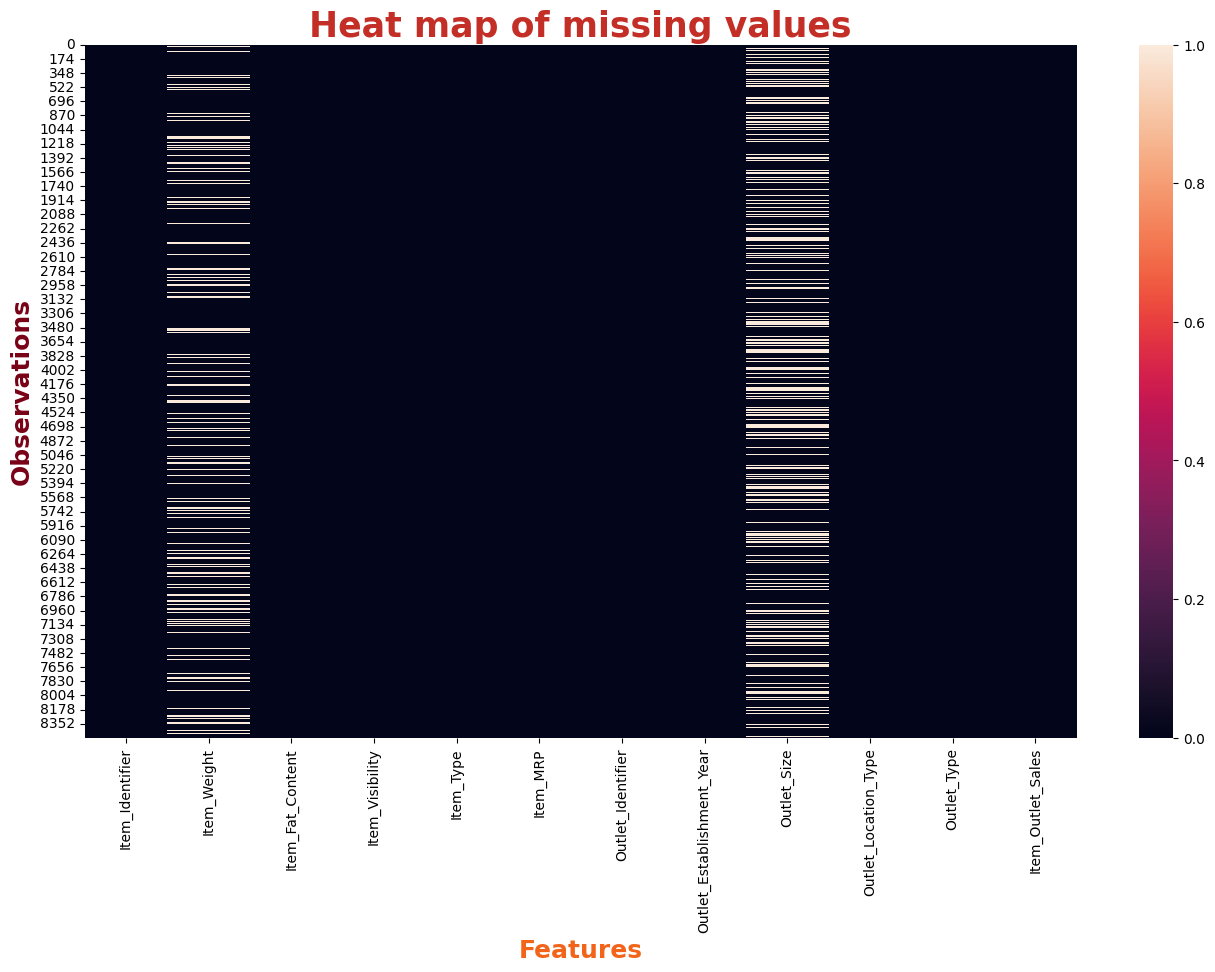

In [61]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isna())

plt.xlabel("Features",size=18,color="#f26419",fontweight="bold")
plt.ylabel("Observations",size=18,color="#780116",fontweight="bold")
plt.title("Heat map of missing values",size=25,fontweight="bold",color="#c32f27")
plt.show()

In [62]:
missing_value_percentage=pd.DataFrame(train.isna().sum()*100/8523)
missing_value_percentage.reset_index(level=0,inplace=True)
missing_value_percentage.columns=["Features","Percentage_of_NA"]
missing_value_percentage

,Features,Percentage_of_NA
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


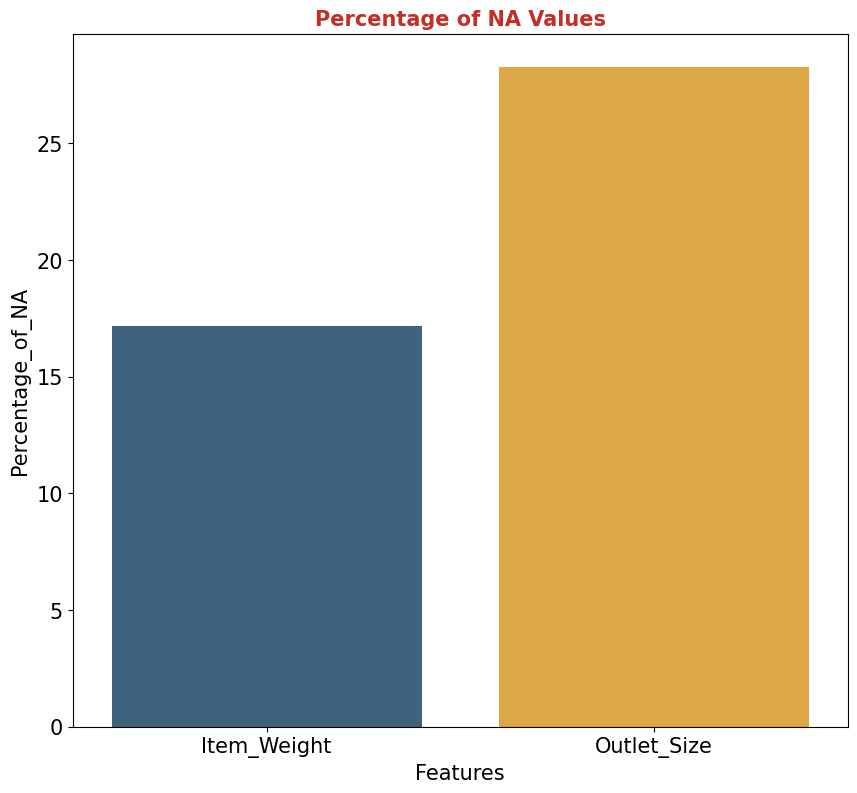

In [63]:
plt.figure(figsize=(10,9))
sns.barplot(x="Features",y="Percentage_of_NA",data=missing_value_percentage[missing_value_percentage["Percentage_of_NA"]>0],palette=['#33658a','#f6ae2d'])
plt.xlabel("Features",size=15)
plt.ylabel("Percentage_of_NA",size=15)
plt.title("Percentage of NA Values",size=15,fontweight="bold",color="#c32f27")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

##### Insights
- 2410 missing values (28.27 %) in the Outlet_Size feature which is a categorical feature.
- 1463 missing values (17.16 %) in the Item_Weight feature

- For dealing with missing values, Need to figure out why the values are missing? 
  - Are these values missing because they weren't recorded or because they does't exist?
    - <b>Does not exist : </b>Then we can keep them as NaN or simply drop them.
    - <b>Were not recorded: </b>Then we can do imputation using different techniques. I'll choose between mean and mode imputation.

In [64]:
train.Outlet_Establishment_Year

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [65]:
train['Outlet_Establishment_Year'].dtype

dtype('int64')

In [66]:
train['Outlet_Identifier'].value_counts() 

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

##### Insights
- Outlet_Identifier" feature can be extremely important for the modelling part since there are only ten(10) values corresponding exactly to the ten(10) stores in which the data have been collected.

#### Numerical Columns

In [67]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

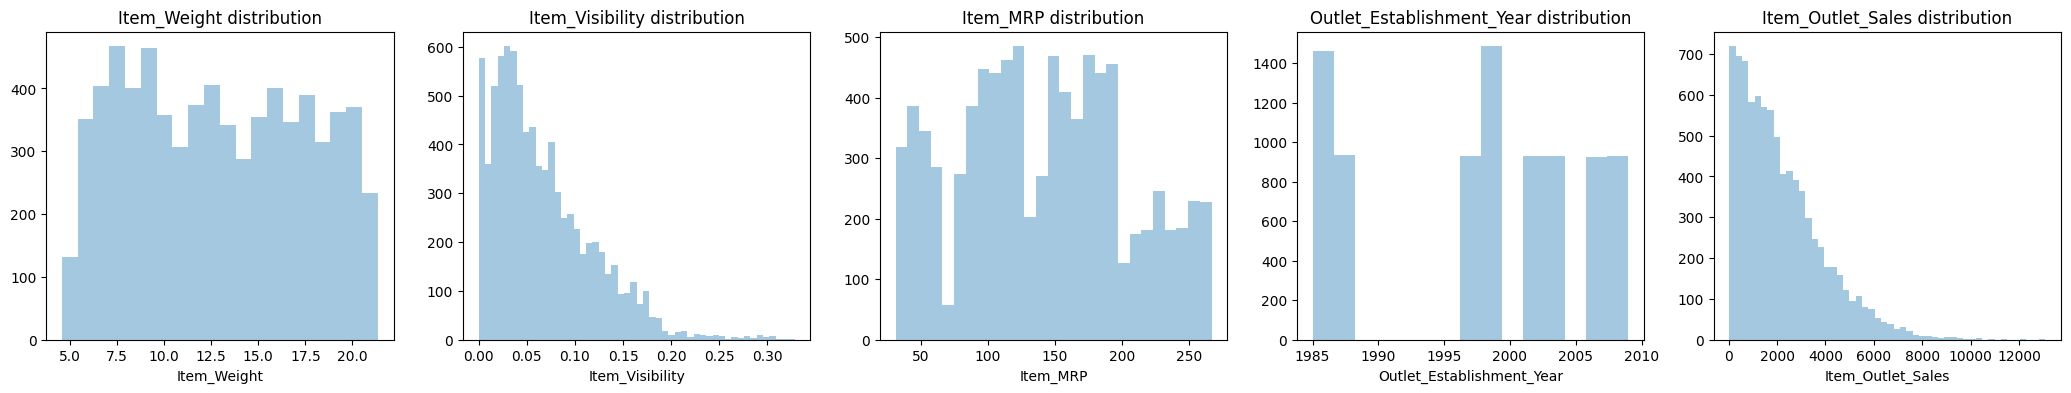

In [68]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.distplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

##### Insights
- Item weight range from 5 Kg to 20 Kg
- Item_Visibility feature is right skewed
- There are more products in the range of 100 MRP - 180 MRP in the Item_MRP feature
- Lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1990 and 1995.
- Item_Outlet_Sales feature is right skewed (Try to transform in order to obtain a normal ou Gaussian distribution)

### Plotting the above 5 graphs one by one for better understanding (Distribution of Numerical Feature)

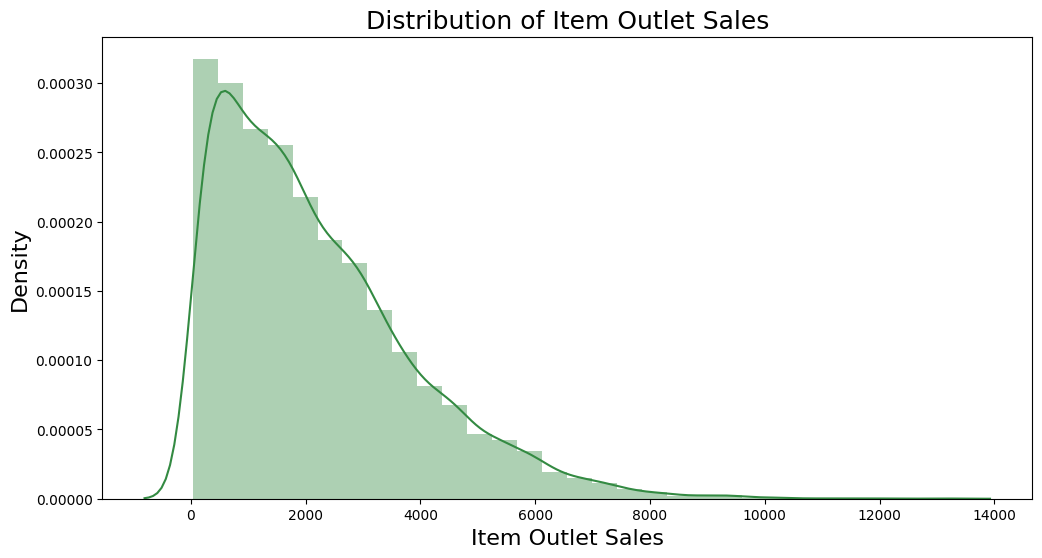

In [69]:
plt.figure(figsize=(12,6))
sns.distplot(train['Item_Outlet_Sales'], color="#338a42", bins=30, kde=True)
plt.xlabel('Item Outlet Sales',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item Outlet Sales',size=18)
plt.show()

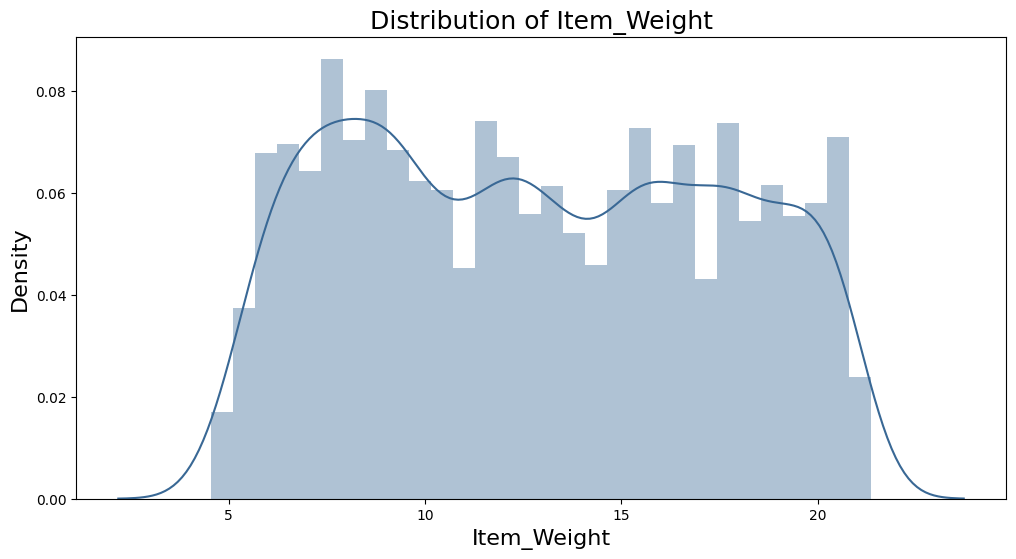

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(train['Item_Weight'], color="#396895", bins=30, kde=True)
plt.xlabel('Item_Weight',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_Weight',size=18)
plt.show()

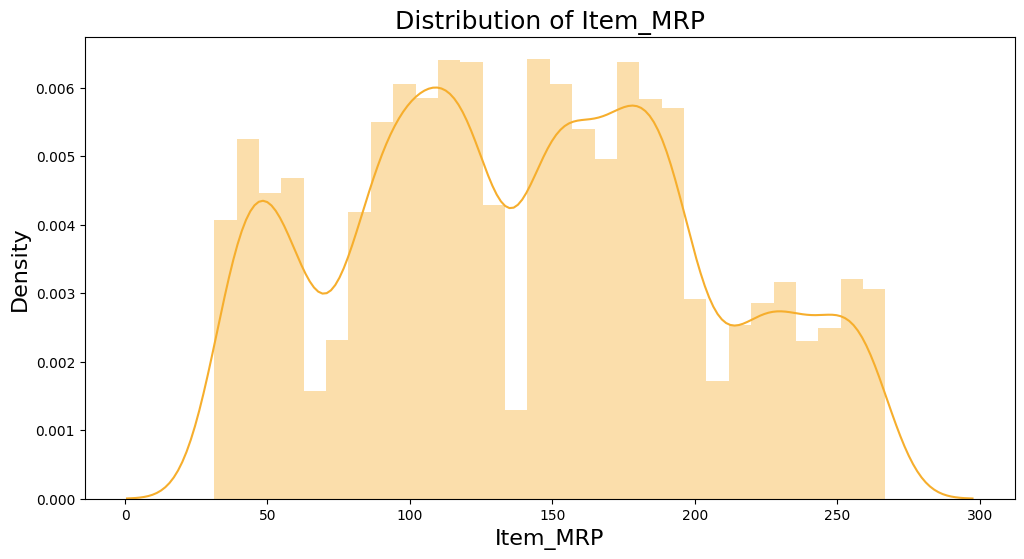

In [71]:
plt.figure(figsize=(12,6))
sns.distplot(train['Item_MRP'], color='#f6ae2d', bins=30, kde=True)
plt.xlabel('Item_MRP',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_MRP',size=18)
plt.show()

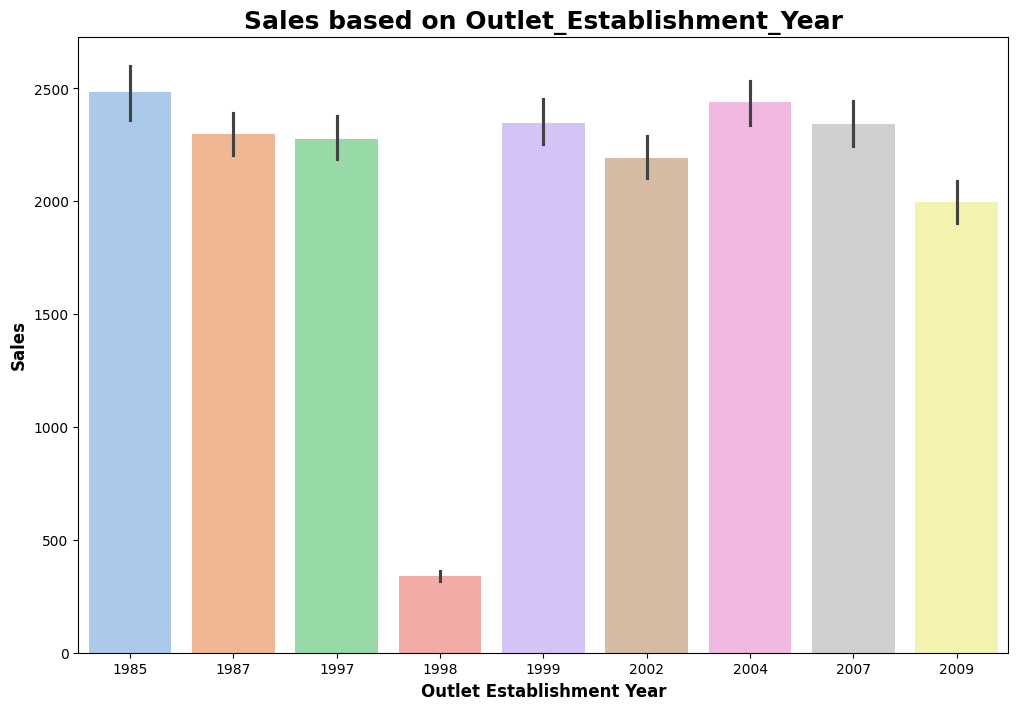

In [72]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=train,x="Outlet_Establishment_Year",y="Item_Outlet_Sales", palette='pastel')
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

##### Why 1998 Outlet are low ?

In [73]:
est_sales = train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
est_sales

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

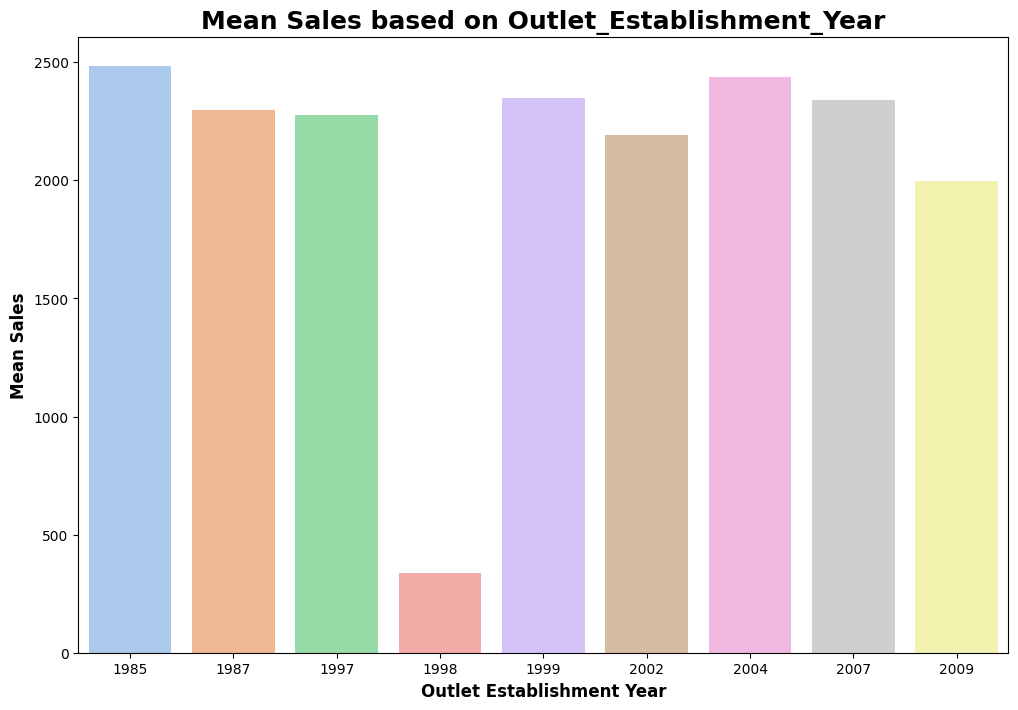

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Mean Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
est_sales = train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
sns.barplot(x=est_sales.index, y=est_sales.values,palette='pastel')
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Mean Sales",size=12,fontweight="bold")
plt.show()

##### Insights 
- Even after taking mean into consideration the average is less. So, based on this the stroes which got established in 1998 are less in sales

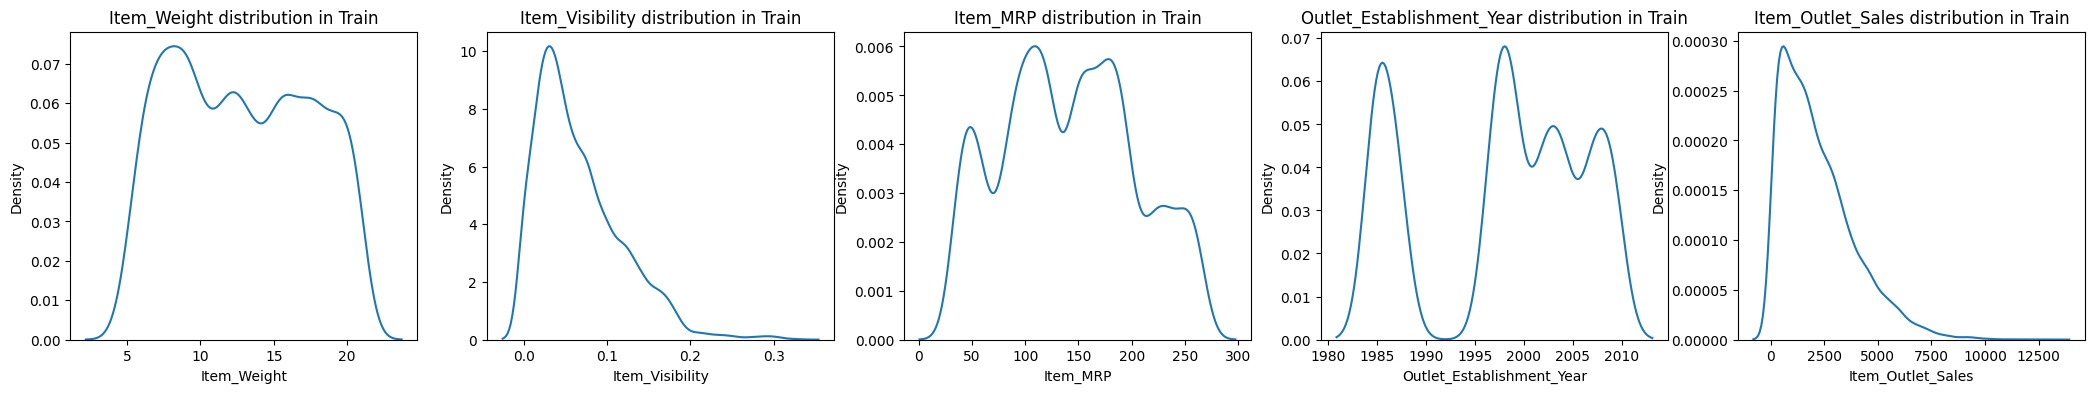

In [75]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.kdeplot(data=train, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

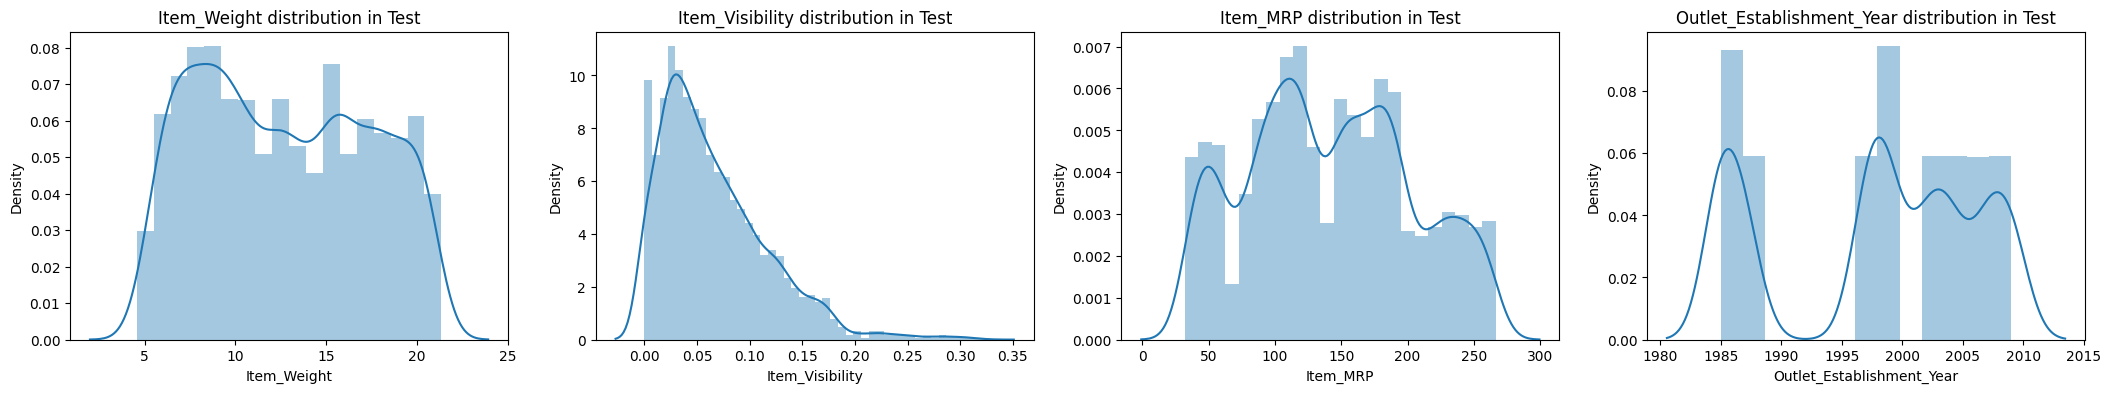

In [76]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

### Outlier Check

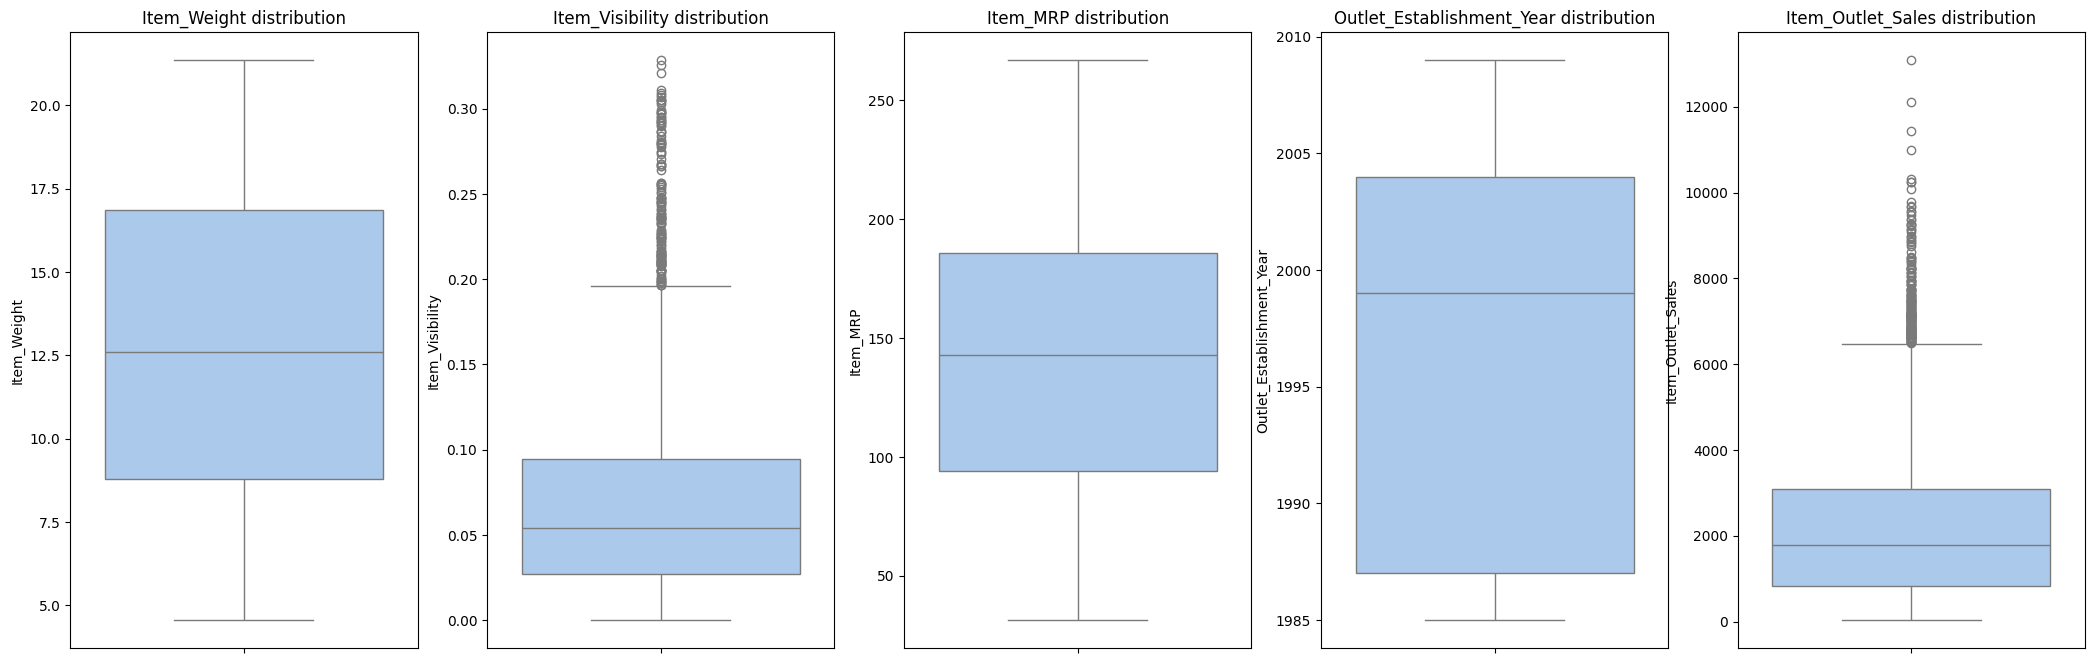

In [77]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train, y=col, ax=ax[index], palette='pastel')
    ax[index].set_title(f'{col} distribution')

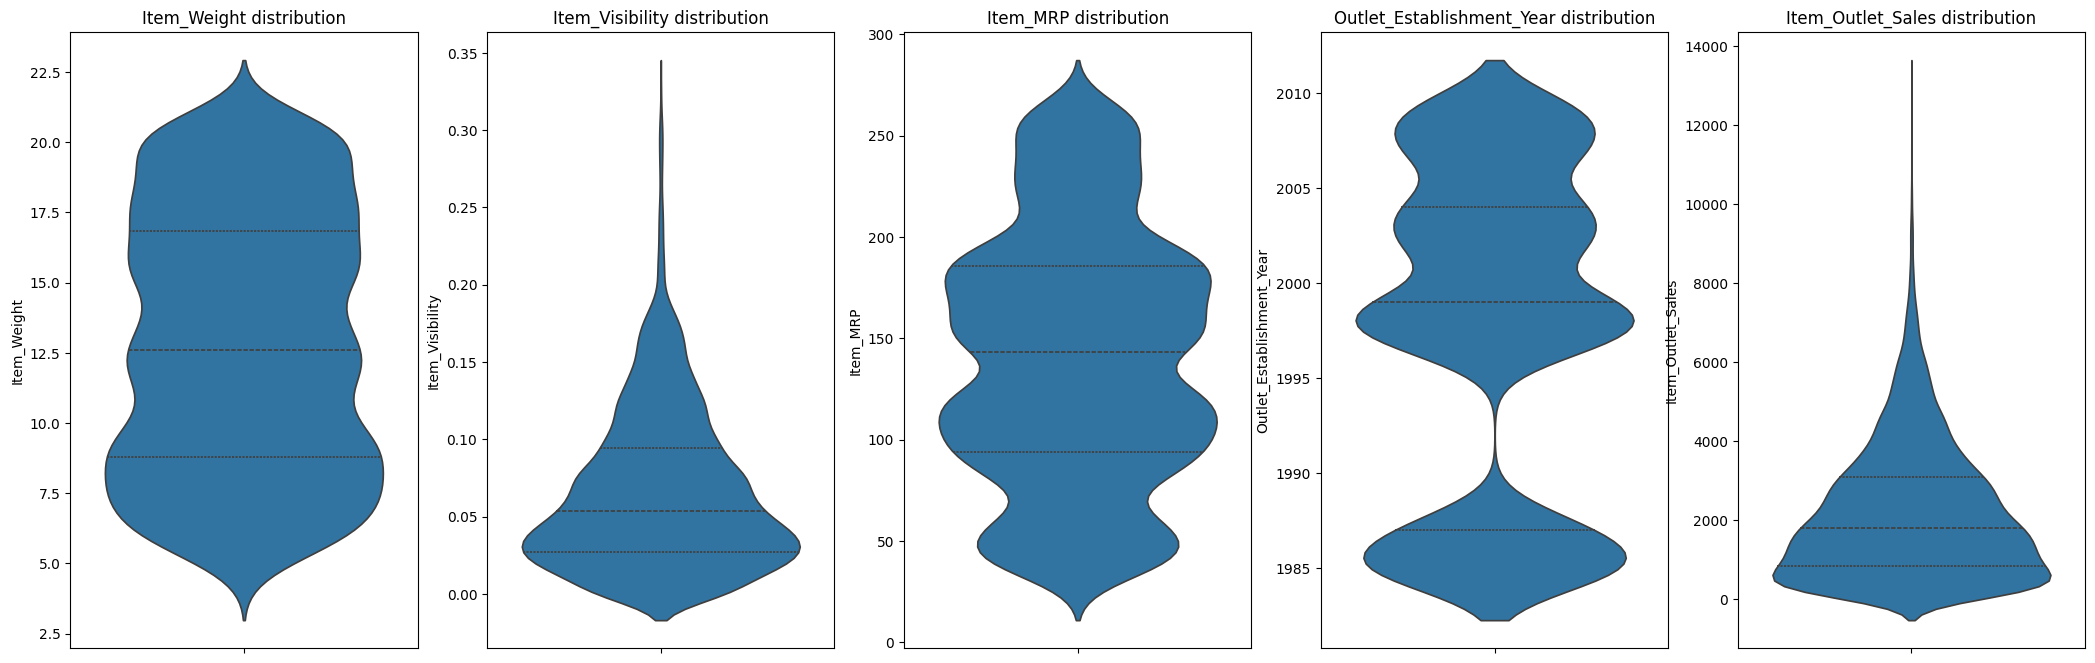

In [78]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.violinplot(data=train, y=col, ax=ax[index], inner='quartile')
    ax[index].set_title(f'{col} distribution')

##### Insights
- No outliers in the Item_Weight, Item_MRP and Outlet_Establishment_Year features
- Outliers are present and to be removed in the Item_Visibility and Item_Outlet_Sales features

### Categorical Columns

In [83]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [84]:
categorical_cols_to_display = [ 
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]
for col in categorical_cols_to_display:
    print(f"Number of values in the {col} column is:\n{train[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
------------

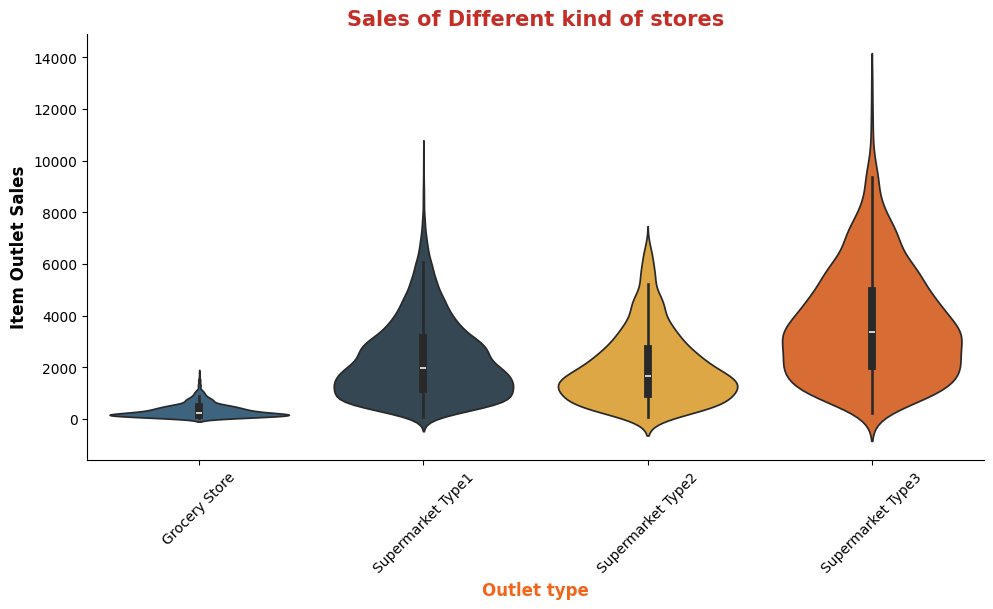

In [79]:
custom_palette = sns.color_palette(['#33658a', '#2f4858', '#f6ae2d','#f26419'])
sns.catplot(data=train, x="Outlet_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Grocery Store","Supermarket Type1","Supermarket Type2","Supermarket Type3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#f26419",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

In [80]:
train['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

In [81]:
train["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

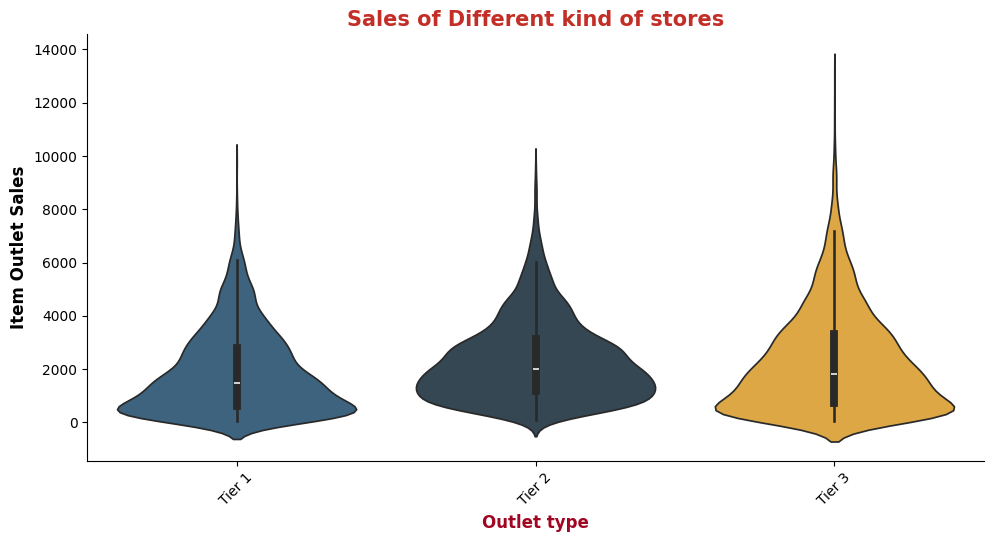

In [82]:
from pandas._libs.algos import pad_inplace
custom_palette = sns.color_palette(['#33658a', '#2f4858', '#f6ae2d'])
sns.catplot(data=train, x="Outlet_Location_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Tier 1", "Tier 2","Tier 3"], palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#A00522",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

##### Insights
- Store which are present in Tier 3 have more sales than Tier 1 and Tier 2

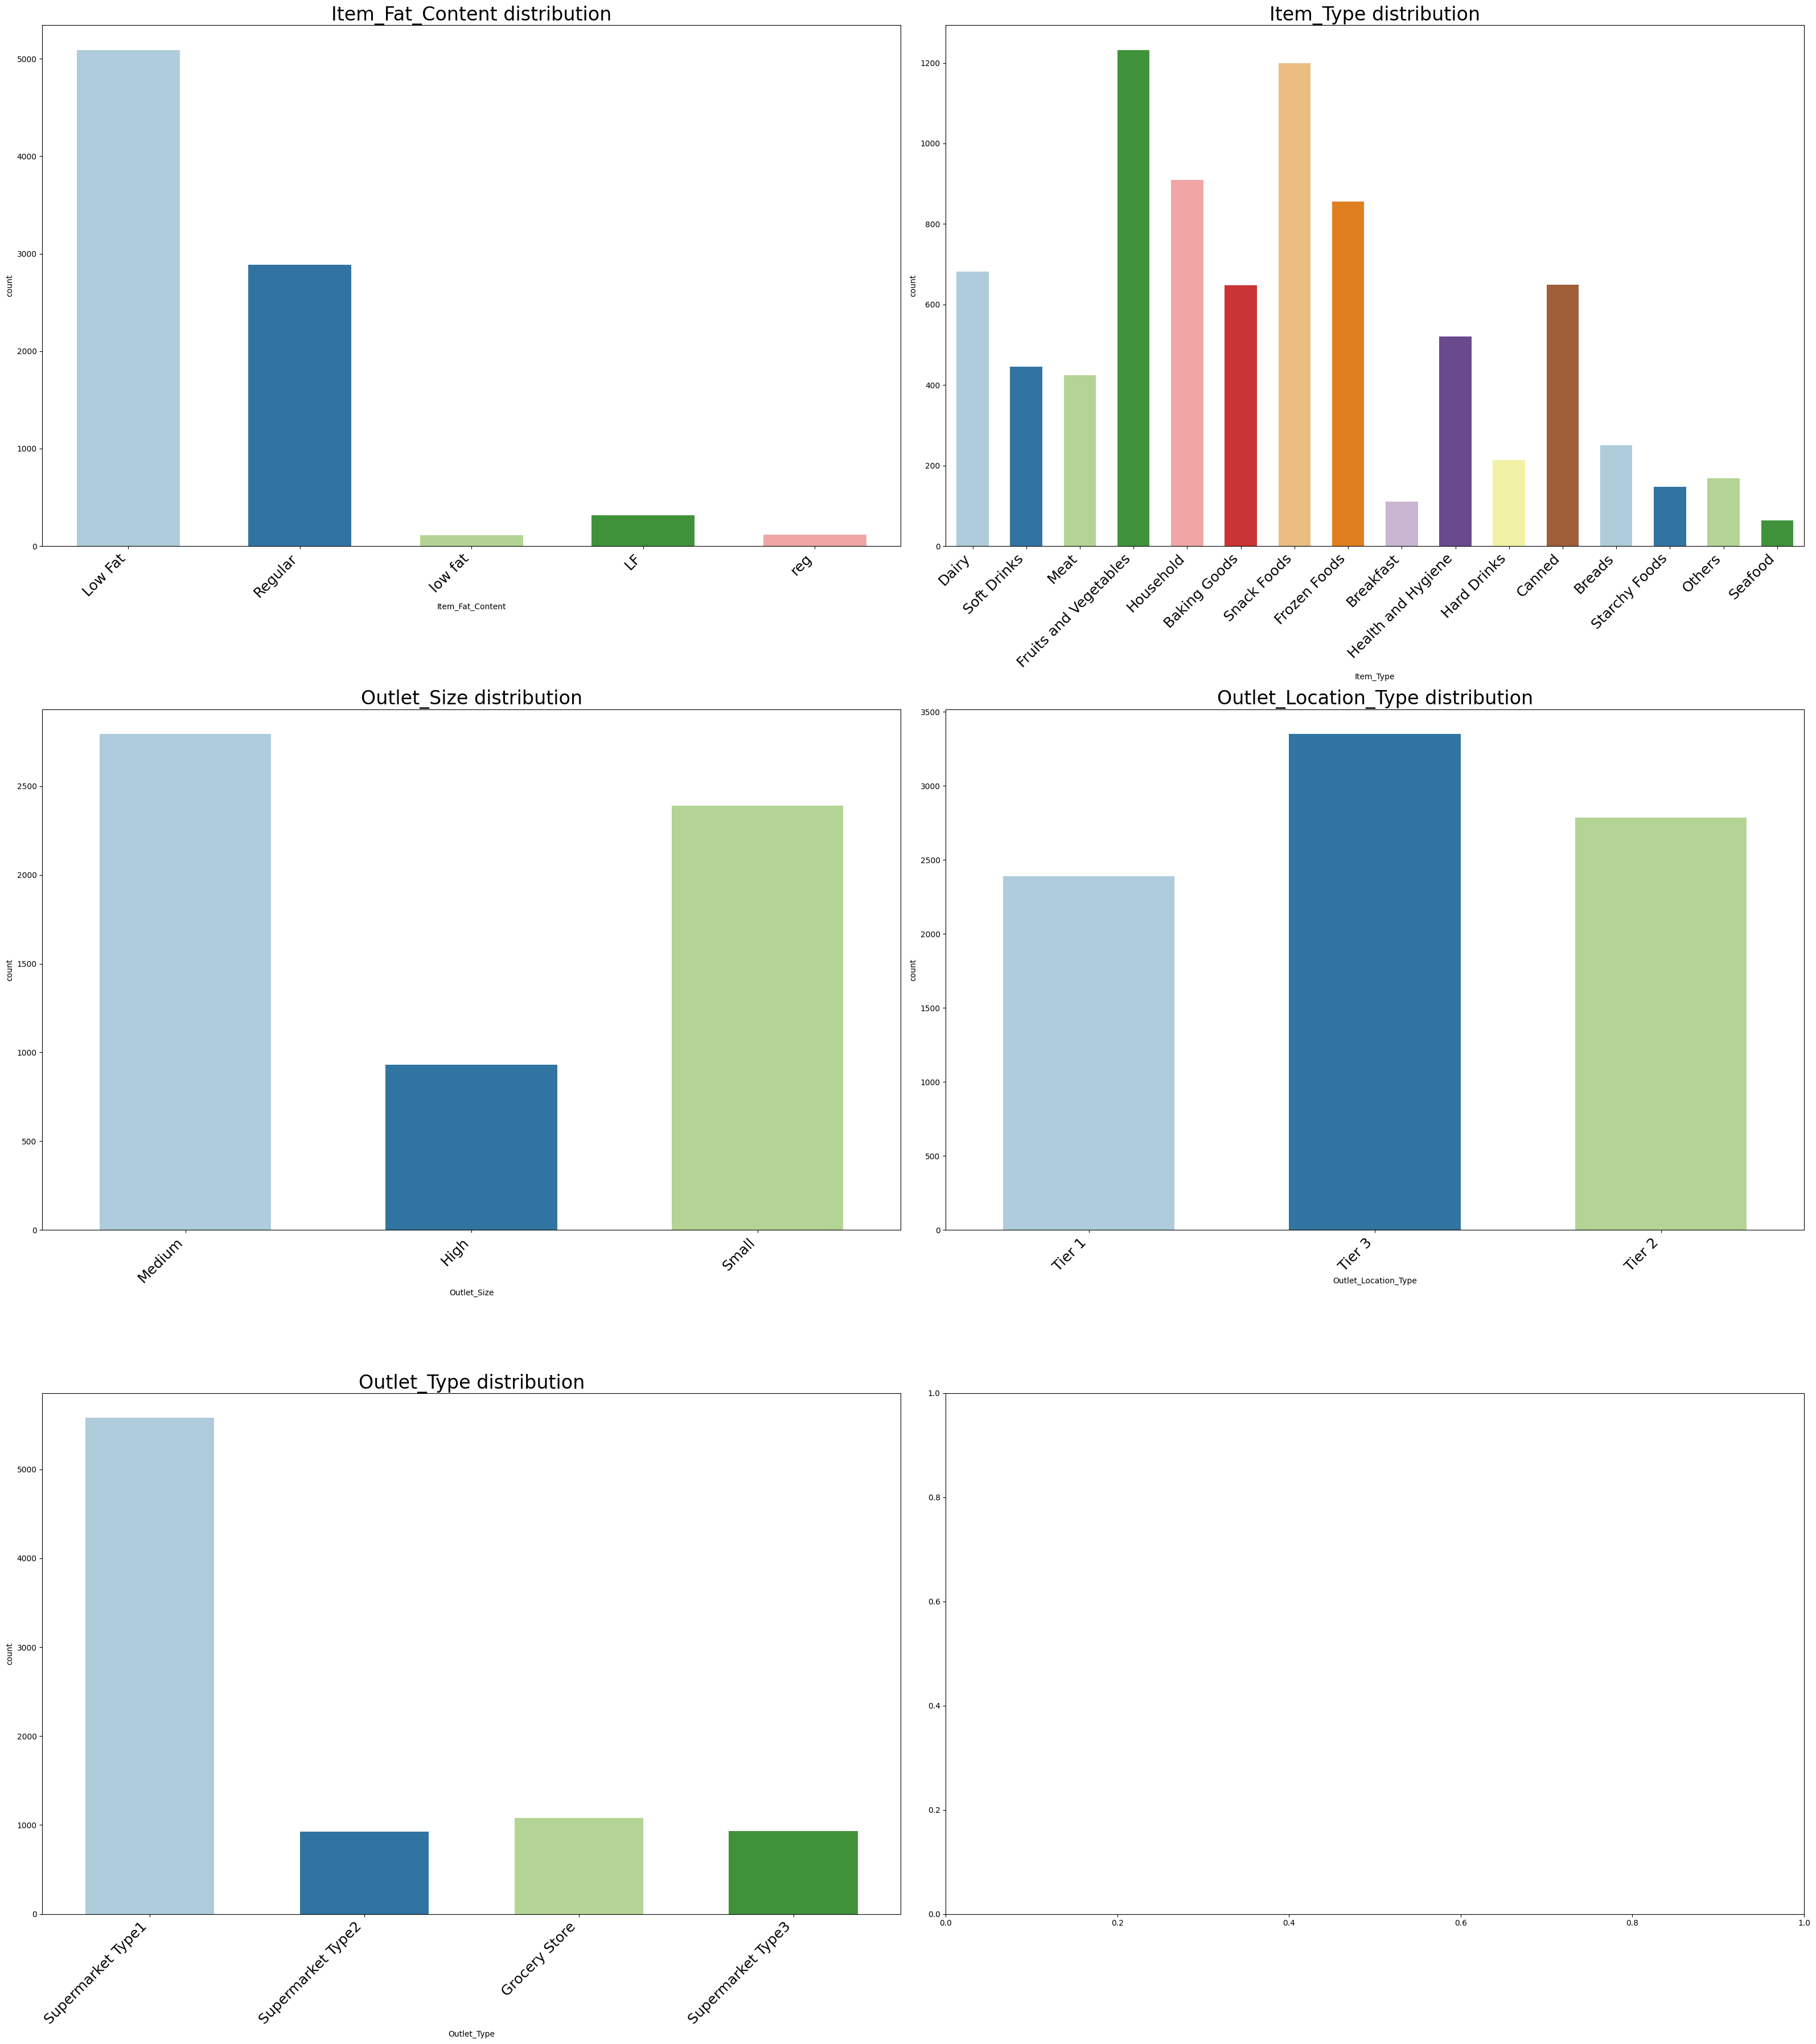

In [86]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 36))

for index, col in enumerate(categorical_cols_to_display):
    r = index // 2
    c = index % 2
    g = sns.countplot(data=train, x=col , ax=ax[r][c], width=0.6, palette='Paired')
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()

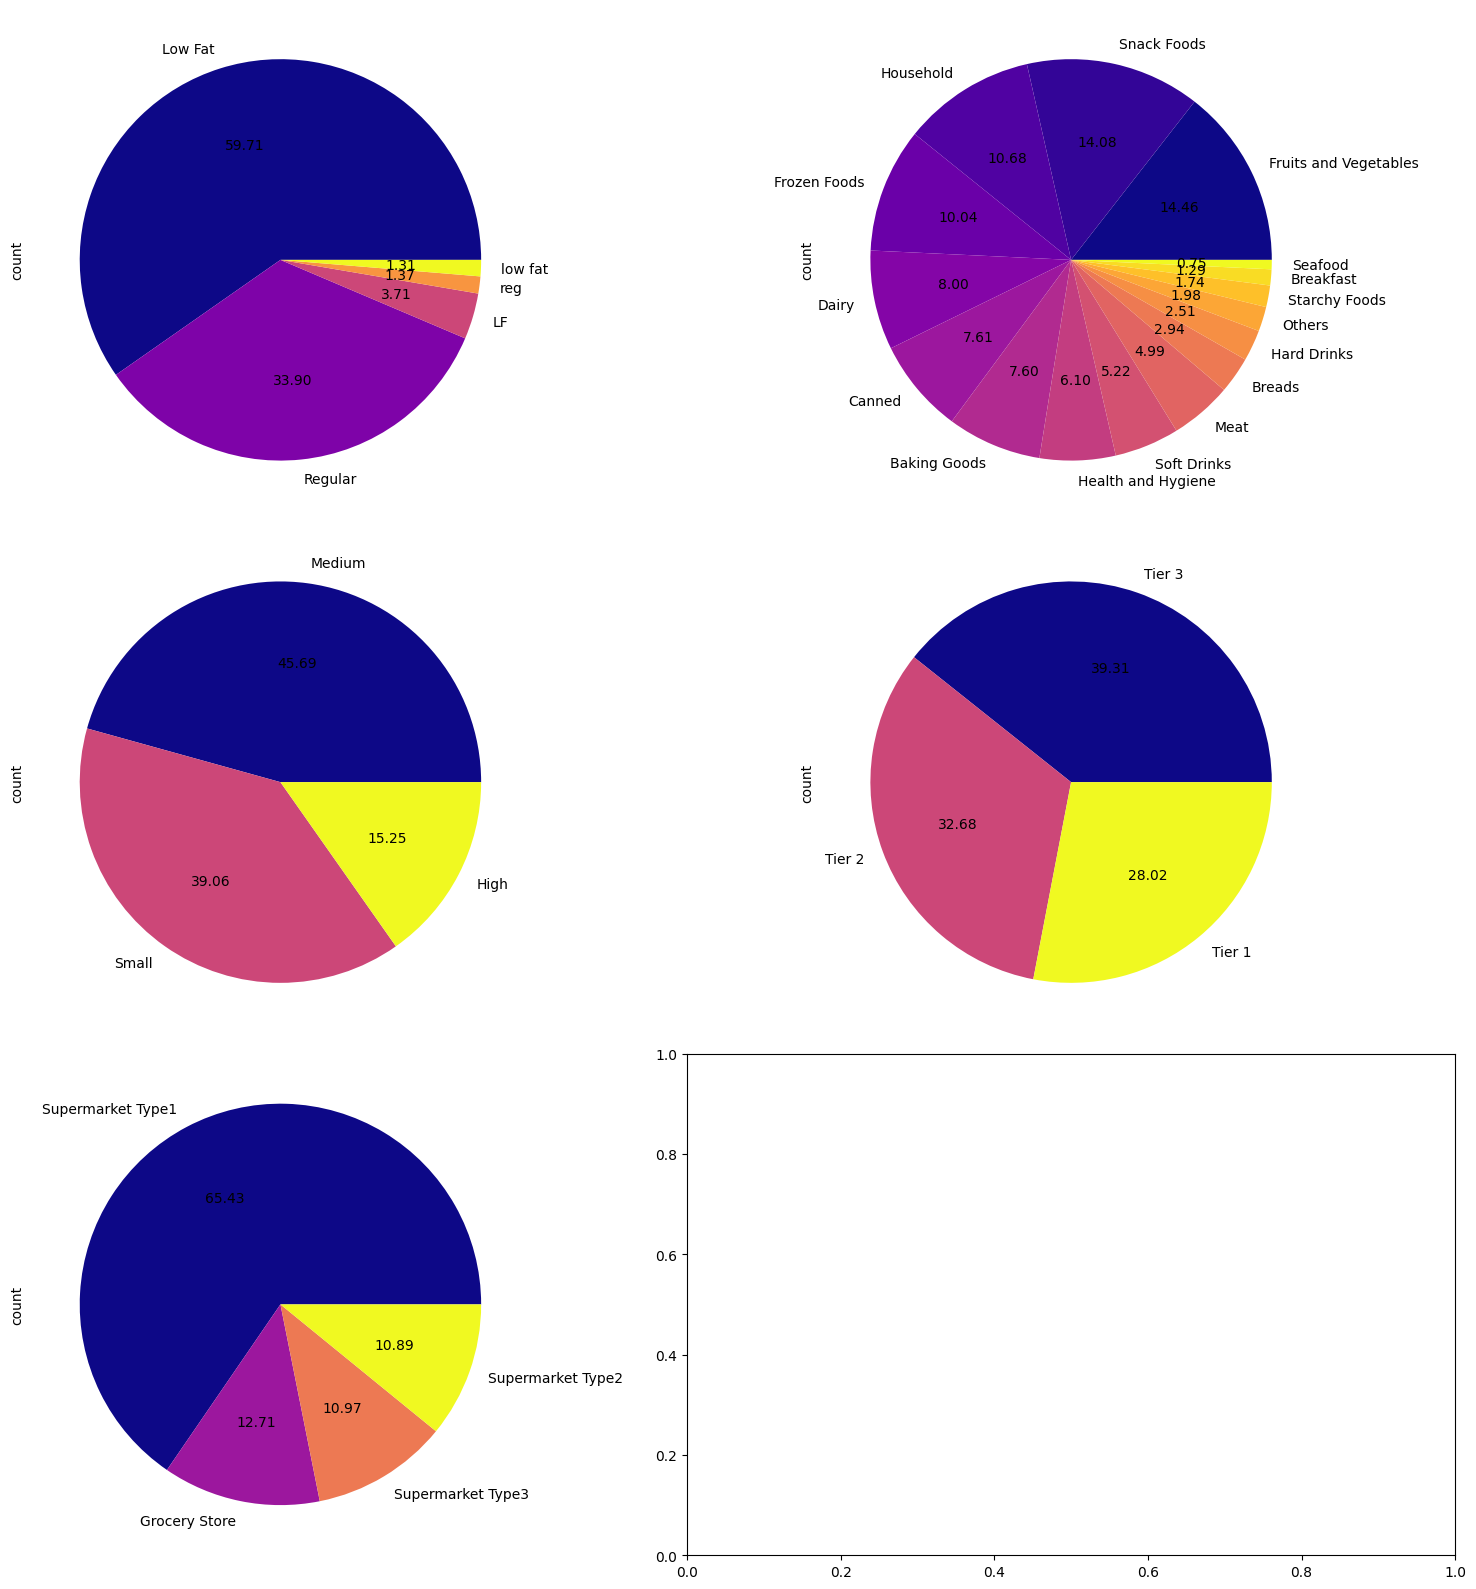

In [89]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

for index, col in enumerate(categorical_cols_to_display):
    r = index // 2
    c = index % 2
    train[col].value_counts().plot(kind="pie", autopct="%.2f", ax=ax[r][c],colormap='plasma')
    #g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    #ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()

##### Insights
- The Item_Fat_Content column must be cleaned because there are some entry errors: ('Low Fat', 'low fat' and 'LF' should be the same category)
- Similarly 'Regular' and 'reg' should the same 
- Another remark in this column is that 'Low Fat' item category is greater than 'Regular' one.

- There are 16 different categories in the the Item_type feature. I think it's a lot. May be in the feature engineering section we can try to group them into categories. For example grouping: 
  - 'Soft Drinks' and 'Hard Drinks' into a 'Drinks' category or 'Snack Foods', 'Frozen Foods', 'Snarchy Foods' and 'Seafood' into a 'Foods' category.

- To encode the Outlet_Location_Type feature, we just have to extract the last character i.e:
  - 'Tier 1' ---> 1
  - 'Tier 2' ---> 2
  - 'Tier 3' ---> 3

In [90]:
target = "Item_Outlet_Sales"

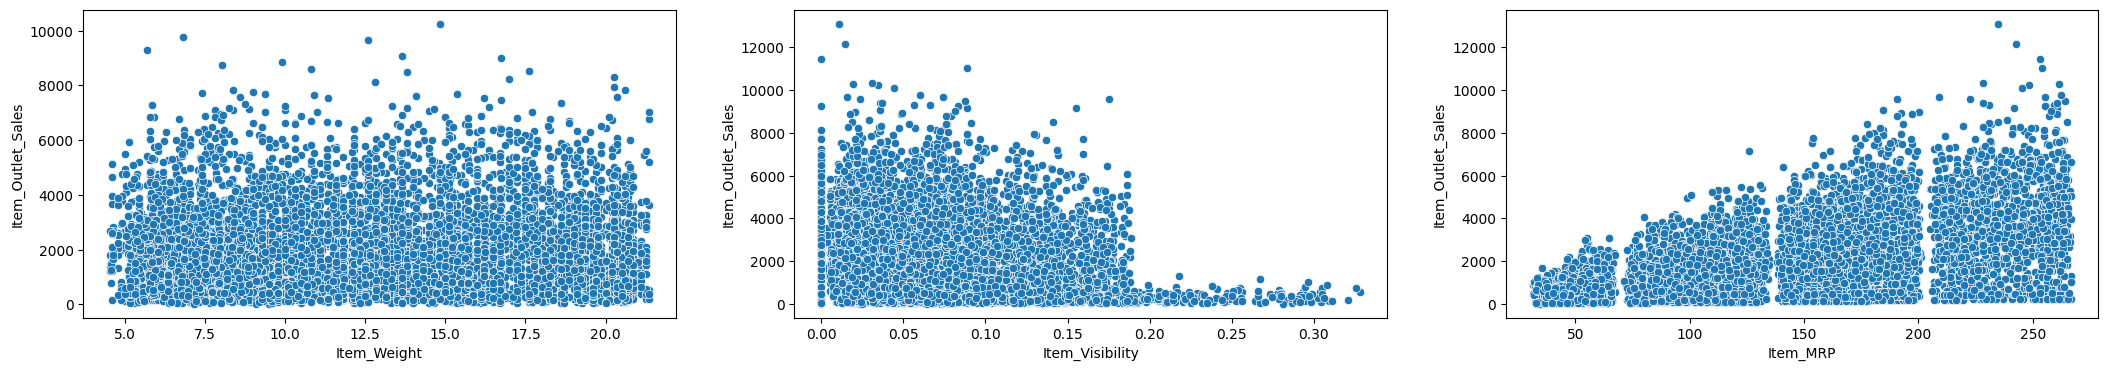

In [91]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target, ax=ax[index])

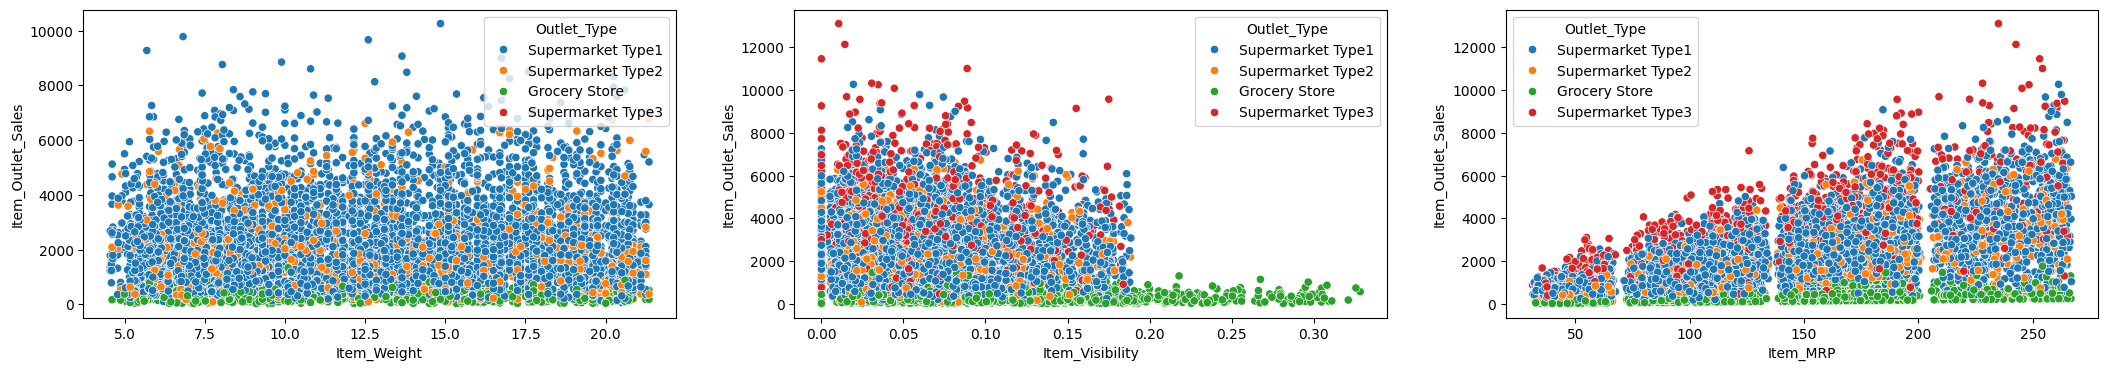

In [92]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target, ax=ax[index], hue='Outlet_Type')

### Handling Missing Values

#### Filling with object values with mode and float type with mean 

In [97]:
# for train
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0]) #replace by the median after
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test
test['Outlet_Size'] = test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0]) #replace by the median after
test['Item_Weight'] = test.Item_Weight.fillna(test.Item_Weight.mean())

In [98]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

#### Detect Outlier using the IQR method in Item_visibility

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


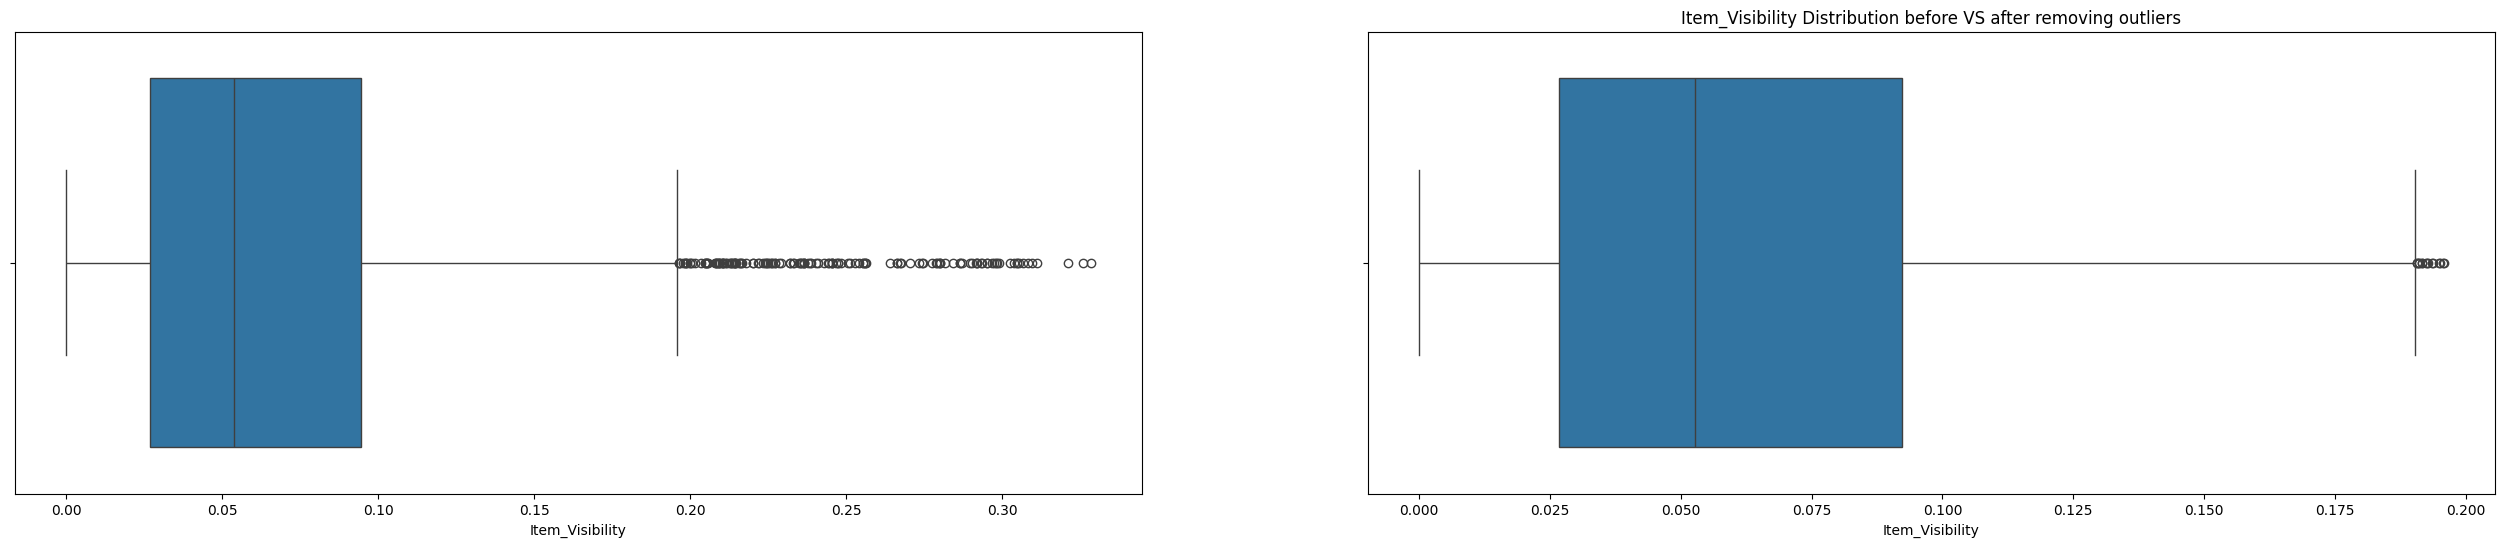

In [99]:
def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(train, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
train = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)] #train
test = test[(test['Item_Visibility'] > lower) & (test['Item_Visibility'] < upper)]     #test

sns.boxplot(x=train['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

#### Detect Outlier using the IQR method in Item_Outlet_Sales

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


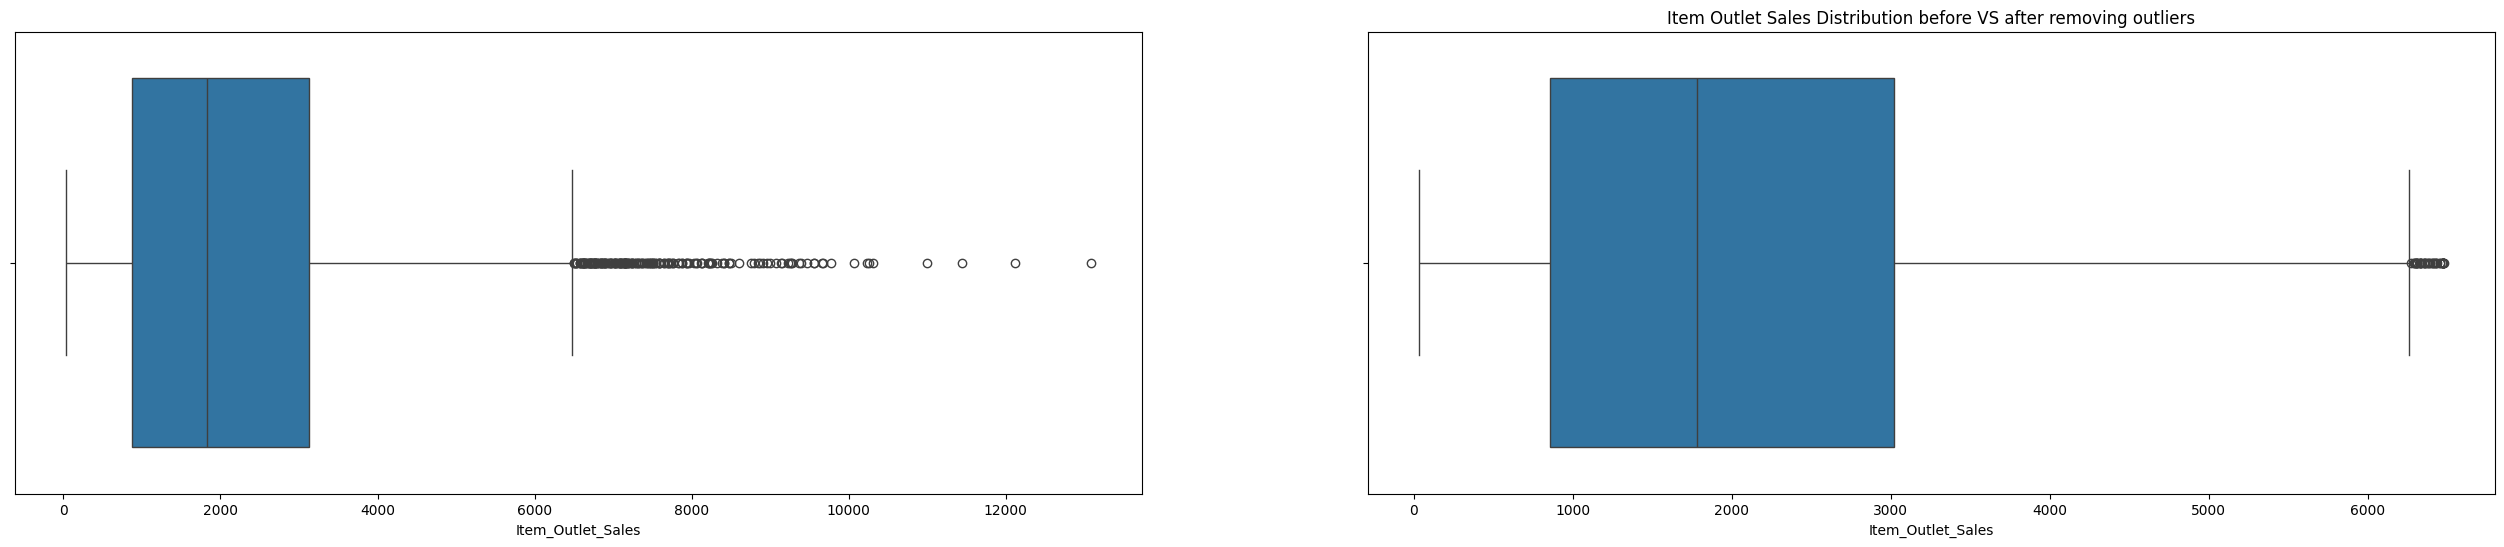

In [100]:
upper, lower = detect_outliers(train, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

#### Correcting the errors in the Item_Fat_Content column

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

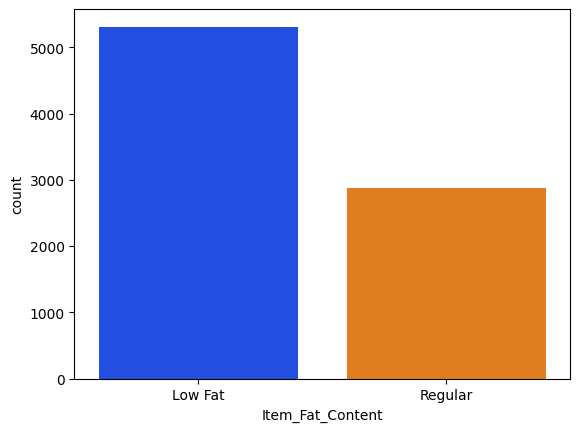

In [102]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

sns.countplot(x=train['Item_Fat_Content'], palette='bright')

#### Getting the amount of established years in new column and delete old column

<Axes: xlabel='Outlet_Age', ylabel='count'>

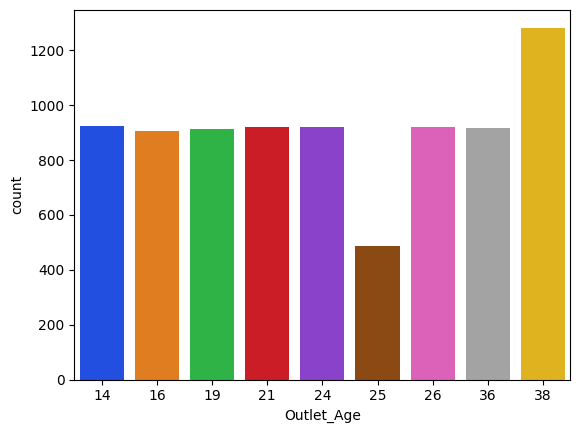

In [103]:
train['Outlet_Age'] = 2023 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2023 - test['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age'], palette='bright')

#### Handling Categorical Values

#### Label Encoding

<Axes: xlabel='Outlet_Size', ylabel='count'>

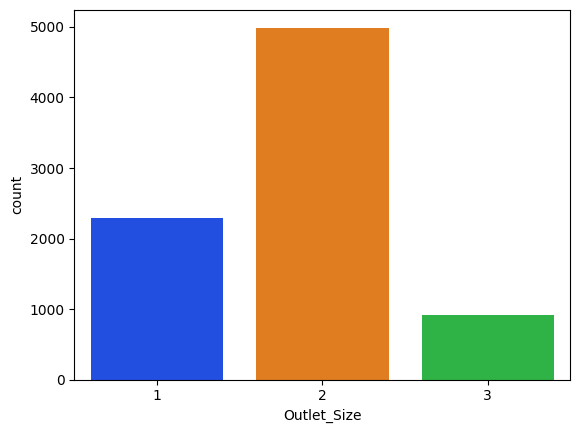

In [104]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

test['Outlet_Size'] = test['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)

sns.countplot(x=train['Outlet_Size'], palette='bright')

#### Outlet_Location_Type feature encoding by getting the last character and converting to int type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

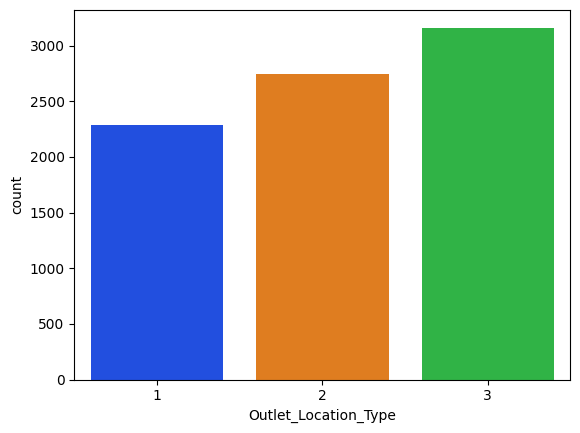

In [105]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test['Outlet_Location_Type']  = test['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=train['Outlet_Location_Type'], palette='bright')

##### Item Identifier column
- In the Item_Type feature, there are 16 catgories but when we look closely to Item_Identifier_Categories, it has first two characters defining the item type, these are:
  - FD for probably Food;
  - DR for probably Drinks;
  - NC for probably Non-Consumables.
- Drop the Item_Identifier feature and create a new column containing these categories.

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

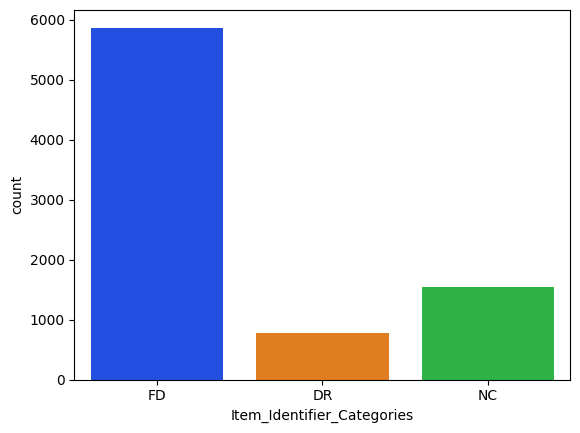

In [107]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2] #.astype(int)
test['Item_Identifier_Categories']  = test['Item_Identifier'].str[0:2]

sns.countplot(x=train['Item_Identifier_Categories'], palette='bright')

In [108]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,24,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,14,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,24,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,25,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,36,NC
